## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
qty_mice = merge_df.nunique()["Mouse ID"]
qty_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dup = merge_df.duplicated(subset=["Mouse ID", "Timepoint"])
#find_dup
dup_mice = merge_df.loc[find_dup, "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = pd.DataFrame(dup_mice)
dup_mice_df

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(dup_mice)==False]                        
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_qty_mice = clean_df.nunique()["Mouse ID"]
clean_qty_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regime_tumor = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
#mean_regime_tumor

In [8]:
median_regime_tumor = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
#median_regime_tumor

In [9]:
var_regime_tumor = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
#var_regime_tumor

In [10]:
STD_regime_tumor = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
#STD_regime_tumor

In [11]:
SEM_regime_tumor = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
#SEM_regime_tumor

In [12]:
# Assemble the resulting series into a single summary dataframe.
regime_tumor_df= pd.DataFrame({"Mean":mean_regime_tumor,
                              "Median":median_regime_tumor,
                              "Variance":var_regime_tumor,
                              "Standerd Dev":STD_regime_tumor,
                              "SEM":SEM_regime_tumor})
regime_tumor_df

,Mean,Median,Variance,Standerd Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # Using the aggregation method, produce the same summary statistics in a single line
stat_regime_tumor = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
#stat_regime_tumor = clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stat_regime_tumor

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

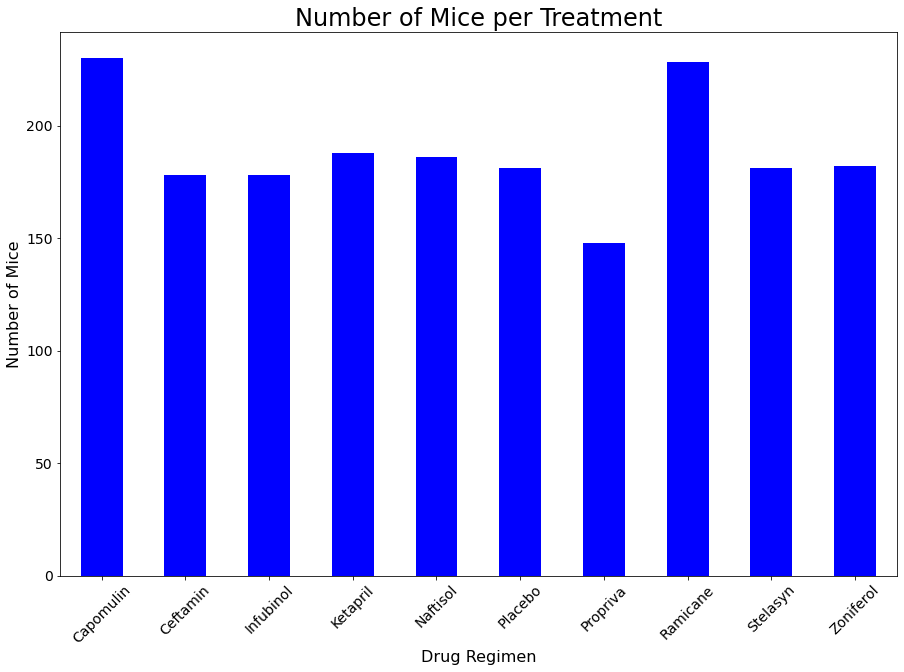

In [52]:
####Bar chart using pandas ####
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#count mice in each regime
pd_mice_ct_reg = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
#pd_mice_ct_reg

#Create bars
pd_mice_ct_reg.plot( kind ='bar',figsize=(15,10), color='b',fontsize = 14, rot=45)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Mice",fontsize = 16)
plt.title("Number of Mice per Treatment",fontsize = 24)

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Create an array of mouse counts for each regime
mice_ct =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
#mice_ct

<function matplotlib.pyplot.show(close=None, block=None)>

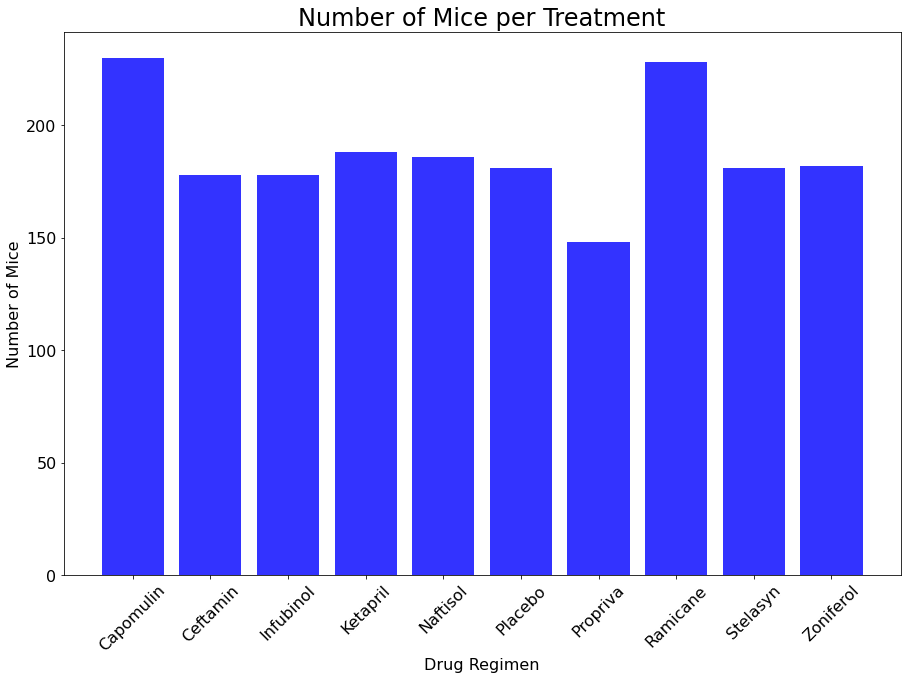

In [16]:
#Set x axis
regimes = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(pd_mice_ct_reg))
#Resize Graph
fig1, ax1 = plt.subplots(figsize=(15, 10))
#Set tick location
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimes, rotation='45',fontsize = 16)
plt.yticks(fontsize=16)

#make bar chart
plt.bar(x_axis, mice_ct, color='b', alpha=.8, align='center')
# Give the chart a title, x label, and y label
plt.title("Number of Mice per Treatment",fontsize = 24)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Mice",fontsize = 16)
plt.show

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Count Gender
pd_sex_ct = clean_df.groupby(["Sex"]).count()["Mouse ID"] 
#pd_sex_ct

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Distribution of Female Versus Male Mice'}, ylabel='Mouse ID'>

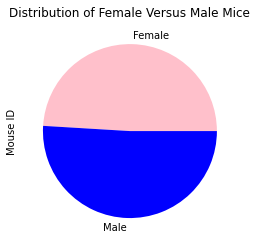

In [66]:
colors = ["pink", "blue"]
pd_sex_ct.plot( kind ='pie',colors=colors, title="Distribution of Female Versus Male Mice")

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplt_gender_ct = clean_df.groupby(["Sex"]).count()["Mouse ID"] 
#pyplt_gender_ct

<function matplotlib.pyplot.show(close=None, block=None)>

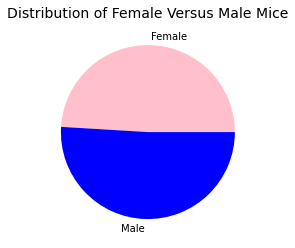

In [55]:
#Pie Chart
gender = ["Female", "Male"]
plt.pie(pyplt_gender_ct, labels=gender, colors=colors)
plt.title("Distribution of Female Versus Male Mice",fontsize = 14, )
plt.show

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
filtered_drugs = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin") 
                              | (clean_df['Drug Regimen'] == "Ramicane") 
                              | (clean_df['Drug Regimen'] == "Infubinol") 
                              | (clean_df['Drug Regimen'] == "Ceftamin")]
#filtered_drugs
last_time = filtered_drugs.groupby("Mouse ID")["Timepoint"].max()
last_time_df = pd.DataFrame({"Max Time": last_time})
last_time_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_drug_df = pd.merge(filtered_drugs, last_time_df, on = "Mouse ID" )
merged_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Time
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,45
810,z581,Infubinol,Female,24,25,30,56.286750,2,45
811,z581,Infubinol,Female,24,25,35,58.628399,3,45
812,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
results = []
 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
